# Les fils d’exécution et la programmation en parallèle

## Les threads

Un thread (fil d’exécution) représente l’exécution d’un ensemble d’instructions au niveau du processeur.

Une application peut avoir plus d’un thread afin d’exécuter des instructions en parallèle.

L’utilisation de plus d’un thread est très pratique sur des machines ayant des processeurs multiples, un processeur multi-core ou un processeur avec « `HyperThreading` ».

En .NET, les threads ont les propriétés suivantes :
- Ils permettent à l’application d’exécuter plusieurs instructions simultanément (donc en parallèle)
- Ils peuvent être gérés et retrouvés dans l’espace de nom « `System.Threading` »
- Ils partagent les ressources de l’application avec les autres threads (du même `AppDomain`)

Toute application en .NET possède un thread principal (commençant avec la méthode « `Main` »)


Les threads sont habituellement utilisés pour :

- Exécuter l’interface graphique (GUI) sur le thread principal et le restant de l’exécution sur un ou plusieurs nouveaux threads.
- Exécuter des tâches additionnelles complémentant l’exécution principale.

Il existe plusieurs façons d’écrire du code asynchrone en C#

- Les délégués asynchrones
- Les threads (`System.Threading`)
- Task Parallel Library (TPL)
  - Parallel LINQ (PLINQ)
  - Les mots-clés asynchrones du C# (`async` et `await`)


## Les délégués asynchrones

https://devblogs.microsoft.com/dotnet/migrating-delegate-begininvoke-calls-for-net-core/

Un délégué peut être invoqué de deux manières:

- Synchrone : sur le même thread donc l’exécution du délégué doit terminer avant de passer à la prochaine instruction
  - Méthode `Invoke()`
- Asynchrone : sur un nouveau thread donc la prochaine instruction est exécutée immédiatement sans attendre pour la fin d’exécution du délégué
  - Méthode `BeginInvoke()`

### Méthode `BeginInvoke`

La méthode `BeginInvoke()` va contenir tous les paramètres définis par le délégué, suivis de deux paramètres :
- `callback` : type `AsyncCallback` (qui est un délégué)
- `object` : type `object`

Une valeur de « `null` » peut être passée à la place des deux paramètres obligatoires.

La méthode `BeginInvoke()` retourne également un objet de type « `IAsyncResult` ».

Prenons un exemple de délégué ne retournant rien, mais acceptant deux paramètres de type « `string` » (donc on utilise `Action<string, string>`)

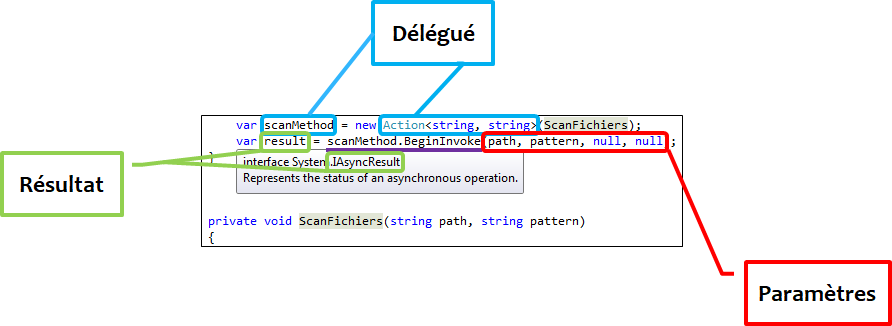

La méthode BeginInvoke accepte quatre paramètres :
arg1 : `string`
arg2 : `string`
callback : `AsyncCallback`
object : `object`
La méthode `BeginInvoke` retourne un objet de type « `IAsyncResult` ».

### Interface `IAsyncResult`

Un objet de type « `IAsyncResult` » représente l’exécution asynchrone d’un délégué.
 - Chaque invocation de délégué de manière asynchrone, donc en utilisant la méthode BeginInvoke, retourne un objet « `IAsyncResult` ».

Cet objet peut être utilisé pour avoir de l’information sur l’exécution du délégué.

Les membres de IAsyncResult sont :
- `AsyncState` : type « `object` » et représente l’objet passé au dernier paramètre durant l’appel de `BeginInvoke`.
- `AsyncWaitHandle` : type « `WaitHandle` » agissant comme sémaphore.
- `CompletedSynchronously` : Indique si le délégué a exécuté de manière synchrone.
- `IsComplete` : Indique si le délégué a terminé d’exécuter.


### Méthode `EndInvoke`

Si un délégué retourne une valeur, cette valeur peut être lue avec la méthode `EndInvoke()`.

La méthode `EndInvoke` va retourner un objet du type de retour que spécifie le délégué.

Afin d’appeler la méthode `EndInvoke`, un objet de type « `IAsyncResult` » (celui obtenu durant l’appel de `BeginInvoke`), doit être passé en paramètre.

### Délégué `AsyncCallback`

L’avant-dernier paramètre de la méthode `BeginInvoke()` permet de spécifier un délégué « `AsyncCallback` »

Ce délégué « `AsyncCallback` » va être appelé aussitôt que l’exécution du délégué asynchrone est terminée

La méthode doit accepter en paramètre un objet de type « `IAsyncResult` »

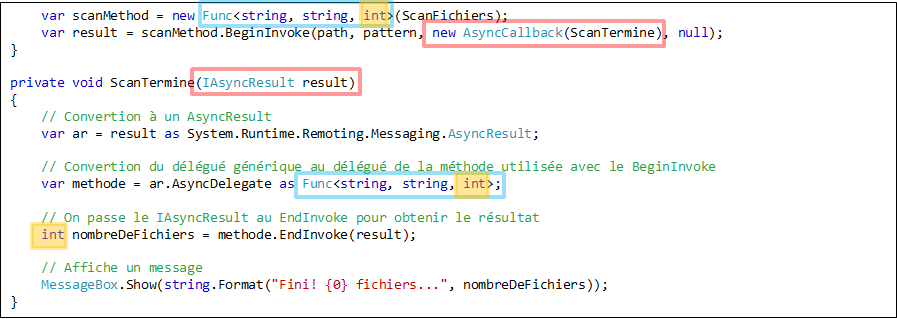

## Programmation asynchrone et les interfaces graphiques (GUI)

La modification d’un objet de l’interface graphique est seulement possible à partir du thread principal (GUI).

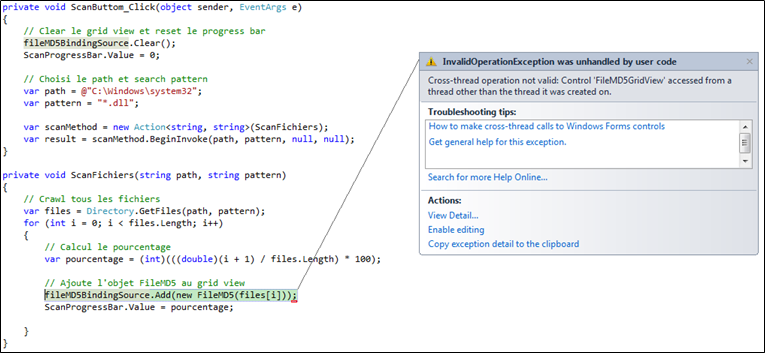

Afin de modifier un objet de l’interface graphique, il faut premièrement vérifier si on peut interagir directement (donc sur le thread principal) ou indirectement (donc sur un thread secondaire)

- La plupart des objets de l’interface graphique contiennent une propriété « `InvokeRequired` » qui indique si l’objet doit être indirectement manipulé (valeur de « `true` »).
- Si la propriété n’est pas disponible, la propriété peut être accédée à partir de l’objet « `Form` ».

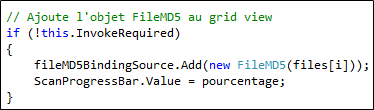

Si l’objet nécessite une interaction indirecte (donc une valeur de « `true` »), un appel à la méthode « `Invoke` » est requis.

La méthode « `Invoke` » requiert un délégué qui va être exécuté à partir du thread principal.
- On va donc passer le code d’interaction GUI à la méthode en utilisant le délégué « `Action` »

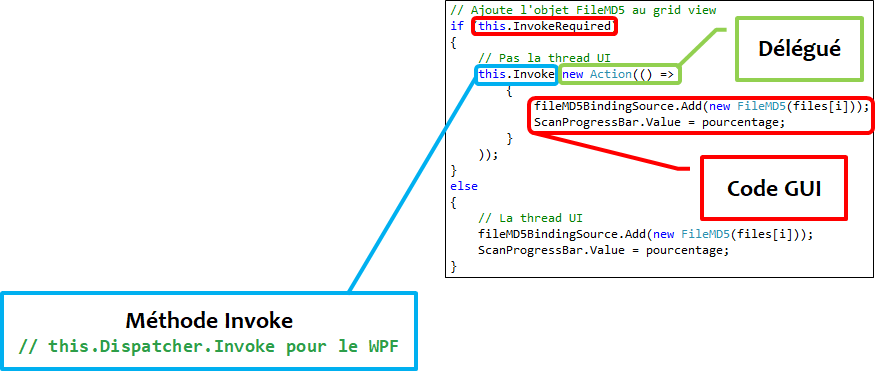

## L'espace nom `System.Threading`

Cet espace de noms comprend plusieurs classes vous permettant de créer une application « `multithread` ».

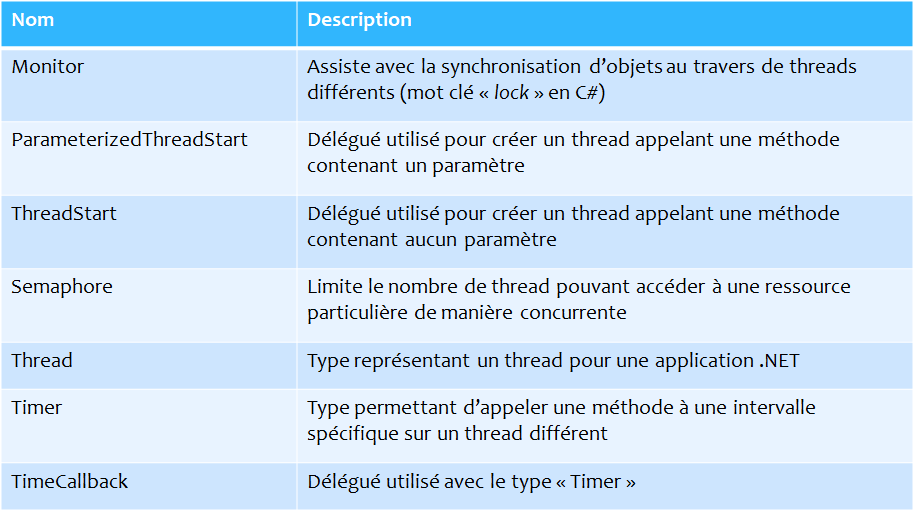

### La classe `System.Threading.Thread`

La classe « `Thread` » permet d’interagir avec le thread courant, créer de nouveaux threads, interrompre/détruire des threads existants, etc.

La classe « `Thread` » dispose d’une méthode statique « `Sleep` » permettant de suspendre le thread courant pour le montant de millisecondes spécifié.
 - L’appel de la méthode « `Sleep` » est considéré comme appel de très base priorité; si le processeur est très occupé et que votre thread exécute un « `Sleep` », le temps spécifié peut ne pas être respecté et prendre en fait plus de temps que vous avez originalement demandé.

La propriété statique « `CurrentThread` » permet d’accéder à l’instance d’un objet « `Thread` » représentant le thread courant.

Une instance d’objet « `Thread` » comprend plusieurs membres :

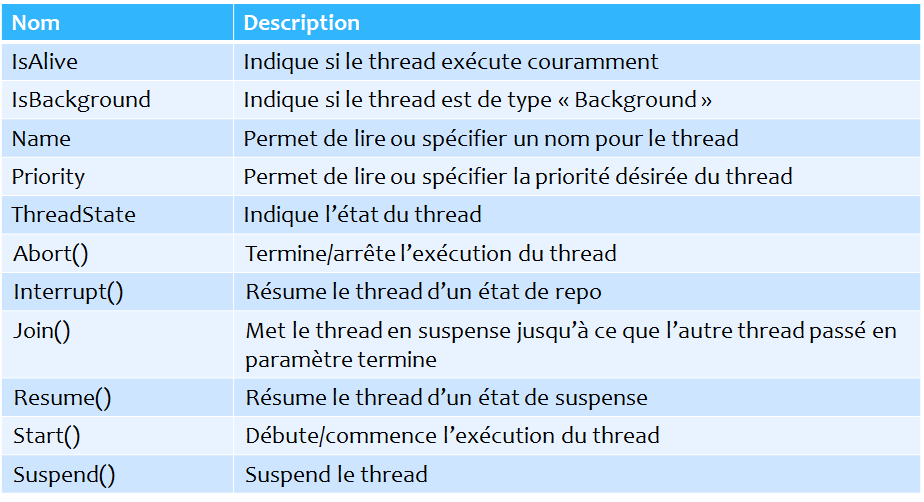

Afin de créer un nouveau thread, il faut premièrement choisir quel délégué utiliser :
 - `ThreadStart` : Aucun retour et aucun paramètre
 - `ParameterizedThreadStart` : Aucun retour mais un paramètre de type « `object` »

Vous pouvez par la suite créer une méthode suivant la signature du délégué choisir et passer celle-ci au constructeur du type « `Thread` »

Le thread peut être exécuté en appelant la méthode « `Start` »

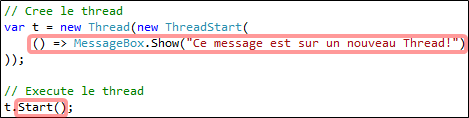

Si on convertit l’exemple pour utiliser un objet « `Thread` » au lieu de la méthode « `BeginInvoke` » d’un délégué…

On peut seulement passer un paramètre de type « `object` » à un Thread, donc il faut changer le code un peu…
- On pourrait créer un objet comptant plusieurs propriétés et passer cet objet à la méthode « `Start` »
  - Meilleure manière, mais un peu plus d’ouvrage
- On pourrait passer un tableau contenant toutes les variables qu’on désire passer
  - Manière simple, mais moins efficace

**De plus, aucun retour est possible…**
- On pourrait créer un objet de type « référence » et affecter une propriété représentant la valeur de retour


Option 1-a et 2-a

Variables passées à l’aide des propriétés de « `ScanFichiersArgs` ».

Retour possible dans la propriété « `FichiersTotal` ».

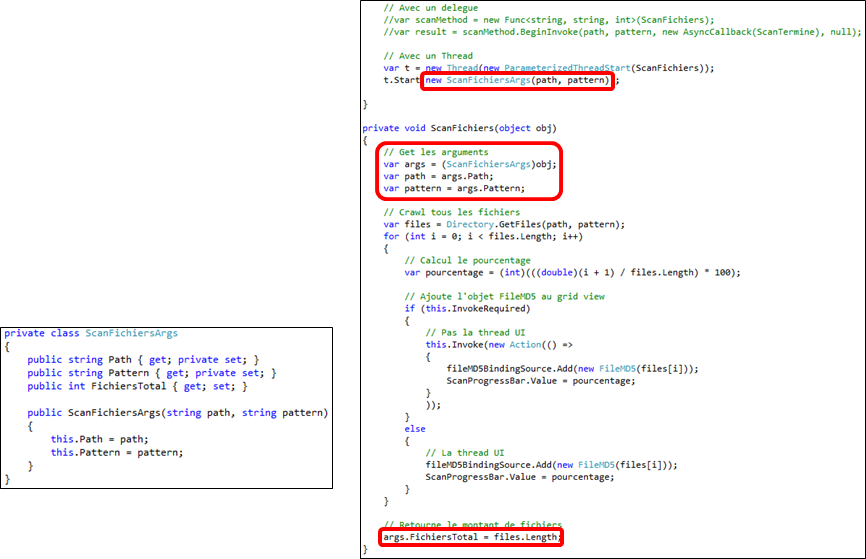

Afin de déterminer quand un thread a fini d’exécuter ou a terminé une action quelconque, vous pouvez utiliser un objet de type « `AutoResetEvent` ».

Un objet « `AutoResetEvent` » permet à un (ou plusieurs) thread d’attendre qu’un autre ait terminé (la synchronisation de threads).

Le thread qui doit attendre a simplement besoin d’appeler la méthode « `WaitOne` ».

Le thread qui exécuter de quoi et ensuite informer l’autre thread qu’il a terminé doit appeler la méthode « `Set` ».

<span style="color: red;">Attention aux dead-locks par contre!!!</span>

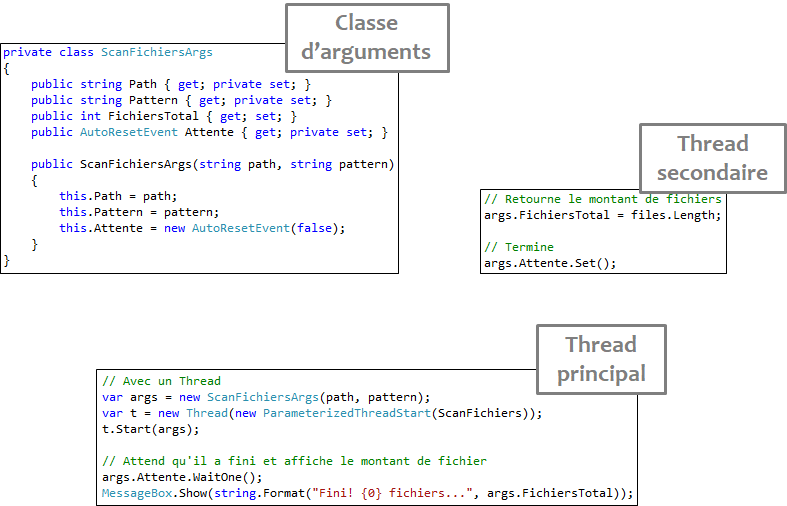

Tout thread par défaut est de type « foreground » qui signifie que l’application ne va pas terminer jusqu’à ce que le thread termine.

Un thread de type « background » va être automatiquement arrêté si l’application se termine.

La propriété « `IsBackground` » permet de transformer un thread en type « background » et vice-versa.



## Concurrence

Dans une application « multi-threaded », si la concurrence n’est pas prise en considération, des résultats inattendus peuvent se produire.

**Exemple 1**
Prenez par exemple le collège… Il y a plusieurs imprimantes et chacune d’entre elles peut manquer de papier. Imaginez qu’il y a deux, trois ou même quatre personnes qui s’occupent de remplir les imprimantes de papiers. Si les quatre reçoivent un « SMS/courriel » en même temps qu’une imprimante est en manque de papiers, ils vont tous se rendre à l’imprimante. Le premier va remplir l’imprimante et partir. Les trois autres vont arriver et l’imprimante va déjà être remplie; ils se sont donc déplacés pour rien.

**Exemple 2**
Autre exemple… Prenez par exemple un script qui scan une table dans une base de données qui sert de répertoire temporaire pour des envois de courriels. Le script va lire chaque entrée, envoyer un courriel et finalement vider la table. Si ce script a deux threads qui vérifient à des intervalles différents, et que par mal chance, les deux threads exécutent en même temps, un duplicata de courriel va être envoyé.


Un autre problème lié à la concurrence est l’accès aux variables à travers de plusieurs threads surtout si ceux-ci modifient la valeur de ses variables.
 - L’accès au data va donc être instable.

Il faut donc faire attention à la logique utilisée lorsqu’on programme avec plusieurs threads.

C# dispose de plusieurs mots clés et classes pouvant aider un programmeur avec la concurrence.

### Mot clé « `volatile` »

Le mot clé « `volatile` » peut seulement être utilisé durant la définition d’une variable membre.

Ce mot clé indique que la variable doit être « multithread-friendly » en laissant accès (écriture et lecture) seulement à un thread à la fois.

### Mot clé « lock »

Le mot clé « `lock` » (qui implémente la classe « `Monitor` ») est utilisé pour délimiter du code qui devrait être exécuté sur un thread à la fois.

Un objet de type référence est nécessaire pour garder le « lock » (un `new object()` partagé entre les threads est suffisant).

Pour utiliser le mot clé « `lock` », il suffit d’écrire :
- Le mot clé « `lock` »
- Passer un objet de type référence en paramètre
- Le bloc de code entre accolades

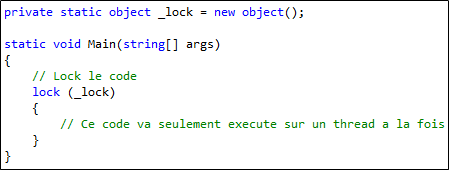

Exemple sans l’utilisation de « `lock` »

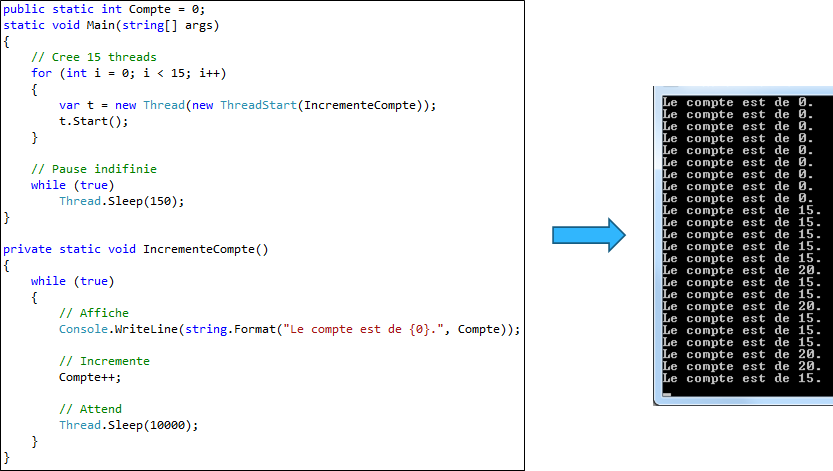

Exemple avec l’utilisation de « `lock` »

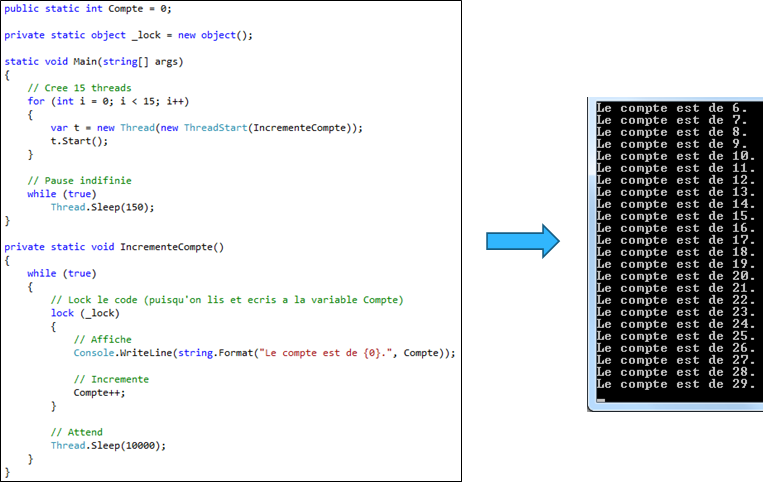

## La classe `System.Threading.Timer`

Si vous désirez exécuter du code à un intervalle spécifique (sans utiliser `Thread.Sleep`), vous pouvez utiliser la classe« `Timer` ».

Lorsque vous initialiser un objet de type « `Timer` », vous devez spécifier un délégué pointant à une méthode n’ayant aucun retour, mais un paramètre de type « `object` ».

Vous pouvez également spécifier quel sera cet objet avec le paramètre « `state` » ainsi que le laps de temps entre chaque exécution et la première exécution.

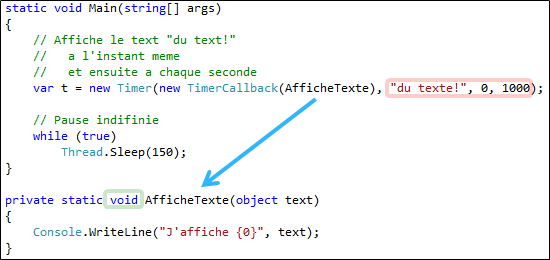